In [15]:
%pylab inline
from IPython.display import Image

def plot_nii(file):
    import nibabel as nb
    nii = nb.load(file)
    nii.orthoview()

Populating the interactive namespace from numpy and matplotlib


In [27]:
from nipype.interfaces.fsl import MCFLIRT
import nibabel as nb

AttributeError: module 'nibabel' has no attribute 'orthoview'

In [9]:
mcflt = MCFLIRT()

In [54]:
file_eg = "/home/jovyan/work/data/ds000114/sub-02/anat/sub-02_T1w.nii.gz"

In [55]:
nb_file = nb.load(file_eg)
nb_file.header
nb_file.shape
#help(nb_file.orthoview)
#dir(nb_file)

(156, 256, 256)

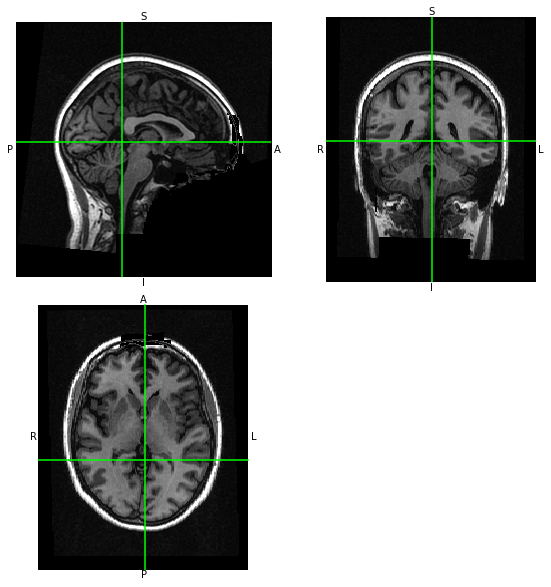

In [56]:
# plottinh an initial file
plot_nii(file_eg)

In [57]:
mcflt.inputs.in_file = file_eg
mcflt.inputs.out_file = "output_mcf.nii.gz"
mcflt.basedir = "test" #can't see that the dir is created TODO

In [58]:
mcflt.run()

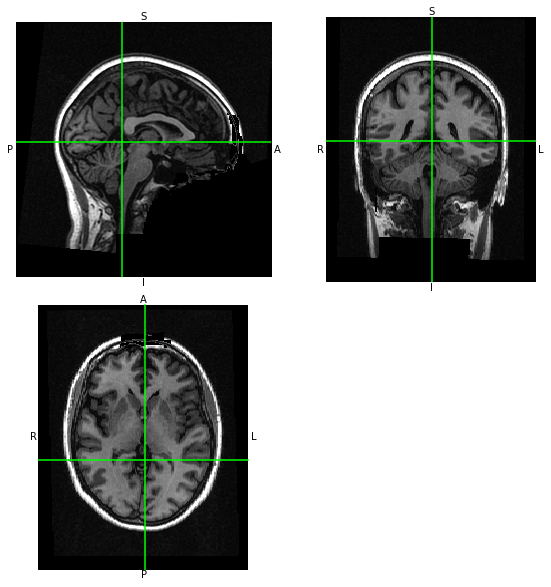

In [59]:
# a new plot after mcfilter - changes are minor
plot_nii(mcflt.inputs.out_file)

In [60]:
mcflt.cmdline

'mcflirt -in /home/jovyan/work/data/ds000114/sub-02/anat/sub-02_T1w.nii.gz -out output_mcf.nii.gz'

In [61]:
t1_in = nb.load(file_eg)
t1_out = nb.load(mcflt.inputs.out_file)

In [62]:
print(t1_in)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (156, 256, 256)
affine: 
[[  1.29900360e+00  -9.88811068e-03  -1.87689960e-02  -9.96064377e+01]
 [  1.28497854e-02   9.99951124e-01   0.00000000e+00  -1.06931519e+02]
 [  2.43852902e-02  -1.83108015e-04   9.99823868e-01  -1.38225372e+02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 156 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [ 1.          1.29929602  1.          1.          0.009616    0.          0.
  0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unkno

In [63]:
print(t1_out)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (156, 256, 256)
affine: 
[[  1.29900360e+00  -9.88811068e-03  -1.87689960e-02  -9.96064377e+01]
 [  1.28497854e-02   9.99951124e-01   0.00000000e+00  -1.06931519e+02]
 [  2.43852902e-02  -1.83108015e-04   9.99823868e-01  -1.38225372e+02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 156 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [ 1.          1.29929602  1.          1.          0.009616    0.          0.
  0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unkno

In [69]:
print(t1_in.get_data().sum())
print(t1_out.get_data().sum())

1.52096e+09
1.52096e+09


In [70]:
# not sure if I can compare max TODO
print(t1_in.get_data().max())
print(t1_out.get_data().max())

3209.0
3209.0


In [66]:
(t1_in == t1_out)

False

In [ ]:
# https://en.wikibooks.org/wiki/Neuroimaging_Data_Processing/Realignment
# https://miykael.github.io/nipype_tutorial/notebooks/introduction_nipype.html
# https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/MCFLIRT